# Лаборатораня работа №2: Обработка признаков (часть 1).

## Устранение пропусков в данных

In [181]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder
import scipy.stats as stats

In [182]:
data = pd.read_csv('crimes.csv')

In [183]:
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Location 1,Total Incidents
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,NaN,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)",1
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,FIREARM,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)",1
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,NaN,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)",1
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,NaN,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)",1
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,NaN,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)",1


In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285807 entries, 0 to 285806
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CrimeDate        285807 non-null  object 
 1   CrimeTime        285807 non-null  object 
 2   CrimeCode        285807 non-null  object 
 3   Location         284184 non-null  object 
 4   Description      285807 non-null  object 
 5   Inside/Outside   281611 non-null  object 
 6   Weapon           97396 non-null   object 
 7   Post             285616 non-null  float64
 8   District         285749 non-null  object 
 9   Neighborhood     284106 non-null  object 
 10  Location 1       284188 non-null  object 
 11  Total Incidents  285807 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 26.2+ MB


In [185]:
bad_cols = []
for col in data.columns:
    if data[col].isnull().sum():
        bad_cols.append(col)
    print(f'{col}: {data[col].isnull().sum()} ({round(data[col].isnull().sum() / data.shape[0] * 100, 3)}%)')
print('\nbad columns:', bad_cols)

CrimeDate: 0 (0.0%)
CrimeTime: 0 (0.0%)
CrimeCode: 0 (0.0%)
Location: 1623 (0.568%)
Description: 0 (0.0%)
Inside/Outside: 4196 (1.468%)
Weapon: 188411 (65.922%)
Post: 191 (0.067%)
District: 58 (0.02%)
Neighborhood: 1701 (0.595%)
Location 1: 1619 (0.566%)
Total Incidents: 0 (0.0%)

bad columns: ['Location', 'Inside/Outside', 'Weapon', 'Post', 'District', 'Neighborhood', 'Location 1']


In [186]:
print("Количество уникальных значений\n")
for col in data.columns:
    print(f'{col}: {data[col].unique().size}')

Количество уникальных значений

CrimeDate: 2143
CrimeTime: 4236
CrimeCode: 81
Location: 25950
Description: 15
Inside/Outside: 5
Weapon: 5
Post: 190
District: 14
Neighborhood: 281
Location 1: 97952
Total Incidents: 1


In [187]:
data.drop(['Total Incidents', 'Weapon'], axis=1, inplace=True)
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,Location 1
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,O,111.0,CENTRAL,Downtown,"(39.2924100000, -76.6140800000)"
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,I,213.0,SOUTHEASTERN,Fells Point,"(39.2824200000, -76.5928800000)"
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,O,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,"(39.3480500000, -76.5883400000)"
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,O,424.0,NORTHEASTERN,Westfield,"(39.3626300000, -76.5516100000)"
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,O,111.0,CENTRAL,Downtown,"(39.2893800000, -76.6197100000)"


In [188]:
data['Inside/Outside'].unique()

array(['O', 'I', 'Outside', 'Inside', nan], dtype=object)

In [189]:
data['Inside/Outside'].replace('I', 'Inside', inplace=True)
data['Inside/Outside'].replace('O', 'Outside', inplace=True)
data['Inside/Outside'].unique()

array(['Outside', 'Inside', nan], dtype=object)

In [190]:
data['Inside/Outside'].value_counts()

Inside     142531
Outside    139080
Name: Inside/Outside, dtype: int64

In [191]:
SimpleImputer(strategy='most_frequent', copy=False).fit_transform(data['Inside/Outside'].values.reshape(-1, 1))

array([['Outside'],
       ['Inside'],
       ['Outside'],
       ...,
       ['Outside'],
       ['Inside'],
       ['Inside']], dtype=object)

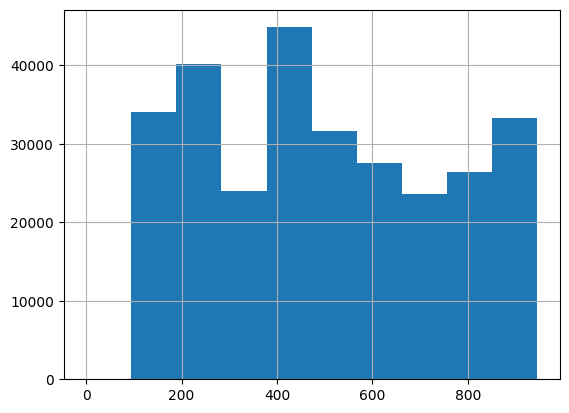

In [192]:
data['Post'].hist();

In [193]:
data = data.dropna(subset=['Post'], axis=0)

In [194]:
data['District'].value_counts()

NORTHEASTERN    44831
SOUTHEASTERN    39243
CENTRAL         33771
SOUTHERN        33010
NORTHERN        31983
NORTHWESTERN    28678
SOUTHWESTERN    26233
EASTERN         24163
WESTERN         23259
NORTHESTERN       264
SOUTHESTERN       179
Gay Street          1
Name: District, dtype: int64

In [195]:
data = data.dropna(subset=['District'], axis=0)
SimpleImputer(strategy='constant', fill_value='-', copy=False).fit_transform(data['Neighborhood'].values.reshape(-1, 1))
SimpleImputer(strategy='constant', fill_value='-', copy=False).fit_transform(data['Location'].values.reshape(-1, 1))

array([['300 SAINT PAUL PL'],
       ['800 S BROADWAY'],
       ['1500 PENTWOOD RD'],
       ...,
       ['2500 ARUNAH AV'],
       ['100 N MONROE ST'],
       ['800 N FREMONT AV']], dtype=object)

In [196]:
data = data.dropna(subset=['Location 1'], axis=0)

x = [float(elem[1:14]) for elem in data['Location 1']]
y = [float(elem[17:30]) for elem in data['Location 1']]
data['X'] = pd.Series(x).reindex(data.index, method='ffill')
data['Y'] = pd.Series(y).reindex(data.index, method='ffill')

data = data.dropna(subset=['X'], axis=0)
data = data.dropna(subset=['Y'], axis=0)
data.drop(['Location 1'], axis=1, inplace=True)

In [197]:
def show_coords_dist():
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.boxplot(data=data['X'], ax=ax1);
    sns.boxplot(data=data['Y'], ax=ax2);
    ax1.set_title('X coord')
    ax2.set_title('Y coord')
    plt.show()

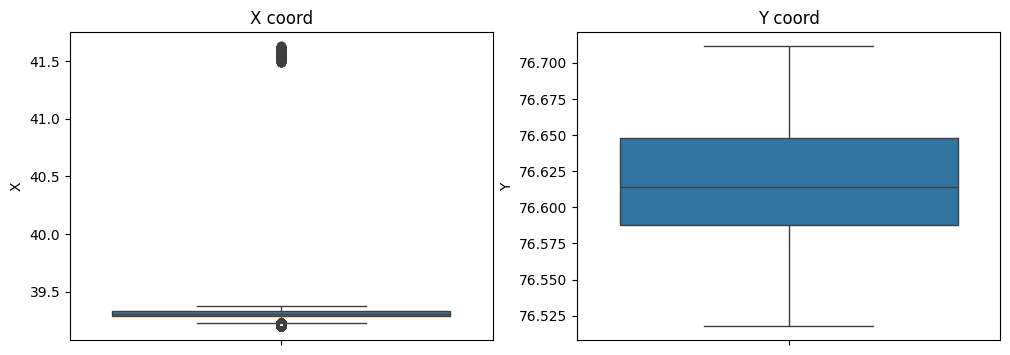

In [198]:
show_coords_dist()

In [199]:
data[data['X'] > 40].shape[0]

164

In [200]:
data.isnull().sum()

CrimeDate         0
CrimeTime         0
CrimeCode         0
Location          0
Description       0
Inside/Outside    0
Post              0
District          0
Neighborhood      0
X                 0
Y                 0
dtype: int64

## Кодирование категориальных признаков

In [201]:
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,X,Y
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,111.0,CENTRAL,Downtown,39.29241,76.61408
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,213.0,SOUTHEASTERN,Fells Point,39.28242,76.59288
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,39.34805,76.58834
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,424.0,NORTHEASTERN,Westfield,39.36263,76.55161
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,111.0,CENTRAL,Downtown,39.28938,76.61971


In [202]:
data['Month'] = [int(elem[:2]) for elem in data['CrimeDate']]
data['Day'] = [int(elem[3:5]) for elem in data['CrimeDate']]
data['Year'] = [int(elem[6:]) for elem in data['CrimeDate']]
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,X,Y,Month,Day,Year
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,111.0,CENTRAL,Downtown,39.29241,76.61408,11,12,2016
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,213.0,SOUTHEASTERN,Fells Point,39.28242,76.59288,11,12,2016
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,39.34805,76.58834,11,12,2016
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,424.0,NORTHEASTERN,Westfield,39.36263,76.55161,11,12,2016
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,111.0,CENTRAL,Downtown,39.28938,76.61971,11,12,2016


In [203]:
data['Hours'] = [int(elem[:2]) for elem in data['CrimeTime']]
data['Minutes'] = [int(elem[3:5]) for elem in data['CrimeTime']]
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,X,Y,Month,Day,Year,Hours,Minutes
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,111.0,CENTRAL,Downtown,39.29241,76.61408,11,12,2016,2,35
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,213.0,SOUTHEASTERN,Fells Point,39.28242,76.59288,11,12,2016,2,56
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,39.34805,76.58834,11,12,2016,3,0
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,424.0,NORTHEASTERN,Westfield,39.36263,76.55161,11,12,2016,3,0
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,111.0,CENTRAL,Downtown,39.28938,76.61971,11,12,2016,3,0


In [204]:
data.isnull().sum()

CrimeDate         0
CrimeTime         0
CrimeCode         0
Location          0
Description       0
Inside/Outside    0
Post              0
District          0
Neighborhood      0
X                 0
Y                 0
Month             0
Day               0
Year              0
Hours             0
Minutes           0
dtype: int64

In [205]:
category_cols = ['CrimeCode', 'Location', 'Description', 'Inside/Outside', 'District', 'Neighborhood']

In [206]:
print("Количество уникальных значений\n")
for col in category_cols:
    print(f'{col}: {data[col].unique().size}')

Количество уникальных значений

CrimeCode: 81
Location: 25941
Description: 15
Inside/Outside: 2
District: 12
Neighborhood: 281


In [207]:
category_cols.remove('Location')
category_cols.remove('Neighborhood')

In [208]:
for col in category_cols:
    data = pd.concat([data, pd.get_dummies(data[col])], axis=1)

In [209]:
data.head()

,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,X,...,Gay Street,NORTHEASTERN,NORTHERN,NORTHESTERN,NORTHWESTERN,SOUTHEASTERN,SOUTHERN,SOUTHESTERN,SOUTHWESTERN,WESTERN
0,11/12/2016,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,111.0,CENTRAL,Downtown,39.29241,...,0,0,0,0,0,0,0,0,0,0
1,11/12/2016,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,213.0,SOUTHEASTERN,Fells Point,39.28242,...,0,0,0,0,0,1,0,0,0,0
2,11/12/2016,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,39.34805,...,0,1,0,0,0,0,0,0,0,0
3,11/12/2016,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,424.0,NORTHEASTERN,Westfield,39.36263,...,0,1,0,0,0,0,0,0,0,0
4,11/12/2016,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,111.0,CENTRAL,Downtown,39.28938,...,0,0,0,0,0,0,0,0,0,0


In [210]:
le1 = LabelEncoder()
encoded_loc = le1.fit_transform(data['Location'])
data.insert(1, 'Location_code', encoded_loc)

In [211]:
data.head()

,CrimeDate,Location_code,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,Neighborhood,...,Gay Street,NORTHEASTERN,NORTHERN,NORTHESTERN,NORTHWESTERN,SOUTHEASTERN,SOUTHERN,SOUTHESTERN,SOUTHWESTERN,WESTERN
0,11/12/2016,10866,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,111.0,CENTRAL,Downtown,...,0,0,0,0,0,0,0,0,0,0
1,11/12/2016,23190,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,213.0,SOUTHEASTERN,Fells Point,...,0,0,0,0,0,1,0,0,0,0
2,11/12/2016,4189,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,413.0,NORTHEASTERN,Stonewood-Pentwood-Winston,...,0,1,0,0,0,0,0,0,0,0
3,11/12/2016,21960,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,424.0,NORTHEASTERN,Westfield,...,0,1,0,0,0,0,0,0,0,0
4,11/12/2016,10904,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,111.0,CENTRAL,Downtown,...,0,0,0,0,0,0,0,0,0,0


In [212]:
le2 = LabelEncoder()
encoded_neig = le2.fit_transform(data['Neighborhood'])
data.insert(1, 'Neighborhood_code', encoded_neig)
data.head()

,CrimeDate,Neighborhood_code,Location_code,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Post,District,...,Gay Street,NORTHEASTERN,NORTHERN,NORTHESTERN,NORTHWESTERN,SOUTHEASTERN,SOUTHERN,SOUTHESTERN,SOUTHWESTERN,WESTERN
0,11/12/2016,63,10866,02:35:00,3B,300 SAINT PAUL PL,ROBBERY - STREET,Outside,111.0,CENTRAL,...,0,0,0,0,0,0,0,0,0,0
1,11/12/2016,85,23190,02:56:00,3CF,800 S BROADWAY,ROBBERY - COMMERCIAL,Inside,213.0,SOUTHEASTERN,...,0,0,0,0,0,1,0,0,0,0
2,11/12/2016,241,4189,03:00:00,6D,1500 PENTWOOD RD,LARCENY FROM AUTO,Outside,413.0,NORTHEASTERN,...,0,1,0,0,0,0,0,0,0,0
3,11/12/2016,264,21960,03:00:00,6D,6600 MILTON LN,LARCENY FROM AUTO,Outside,424.0,NORTHEASTERN,...,0,1,0,0,0,0,0,0,0,0
4,11/12/2016,63,10904,03:00:00,6E,300 W BALTIMORE ST,LARCENY,Outside,111.0,CENTRAL,...,0,0,0,0,0,0,0,0,0,0


In [213]:
data.drop(['Neighborhood', 'Location', 'CrimeTime', 'CrimeCode', 'Description', 'Inside/Outside', 'District', 'CrimeTime', 'CrimeDate'], axis=1, inplace=True)

In [214]:
data.head()

,Neighborhood_code,Location_code,Post,X,Y,Month,Day,Year,Hours,Minutes,...,Gay Street,NORTHEASTERN,NORTHERN,NORTHESTERN,NORTHWESTERN,SOUTHEASTERN,SOUTHERN,SOUTHESTERN,SOUTHWESTERN,WESTERN
0,63,10866,111.0,39.29241,76.61408,11,12,2016,2,35,...,0,0,0,0,0,0,0,0,0,0
1,85,23190,213.0,39.28242,76.59288,11,12,2016,2,56,...,0,0,0,0,0,1,0,0,0,0
2,241,4189,413.0,39.34805,76.58834,11,12,2016,3,0,...,0,1,0,0,0,0,0,0,0,0
3,264,21960,424.0,39.36263,76.55161,11,12,2016,3,0,...,0,1,0,0,0,0,0,0,0,0
4,63,10904,111.0,39.28938,76.61971,11,12,2016,3,0,...,0,0,0,0,0,0,0,0,0,0


## Нормализация числовых признаков

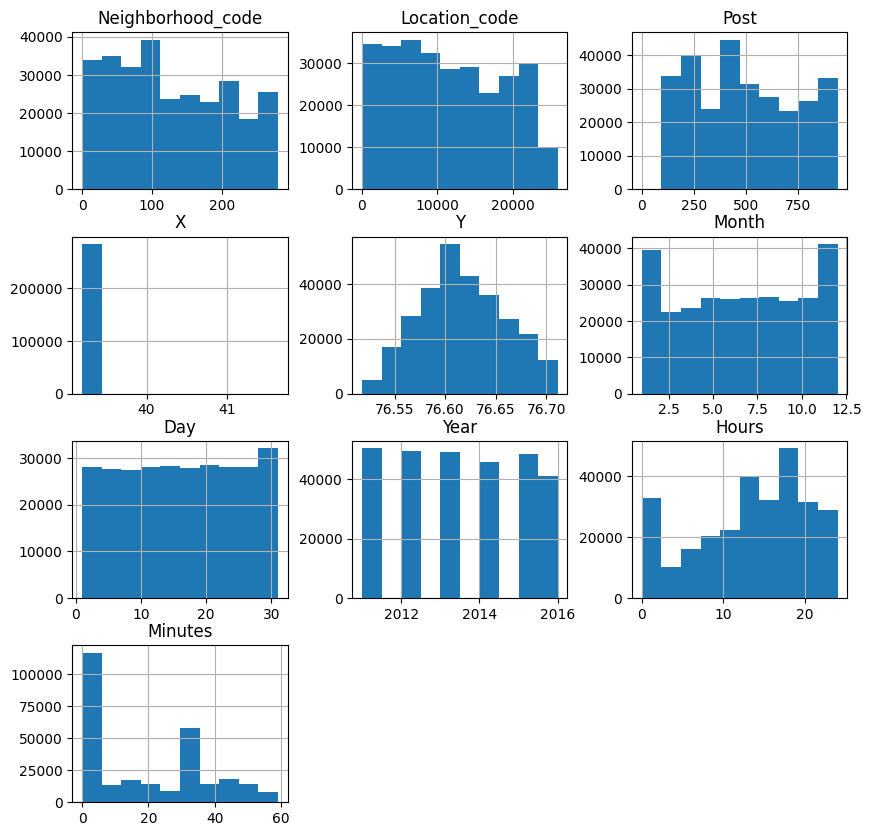

In [215]:
data[['Neighborhood_code', 'Location_code', 'Post', 'X', 'Y', 'Month', 'Day', 'Year', 'Hours', 'Minutes']].hist(figsize=(10,10));

In [304]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(8,2))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [245]:
data.describe()

,Neighborhood_code,Location_code,Post,X,Y,Month,Day,Year,Hours,Minutes,...,NORTHEASTERN,NORTHERN,NORTHESTERN,NORTHWESTERN,SOUTHEASTERN,SOUTHERN,SOUTHESTERN,SOUTHWESTERN,WESTERN,Day_norm
count,284170.000000,284170.000000,284170.000000,284170.000000,284170.000000,284170.000000,284170.000000,284170.000000,284170.000000,284170.000000,...,284170.000000,284170.000000,284170.000000,284170.00000,284170.000000,284170.000000,284170.000000,284170.000000,284170.000000,284170.000000
mean,126.153531,11477.877443,504.204560,39.308648,76.617369,6.587585,15.764430,2013.407404,13.286642,18.534395,...,0.157761,0.111644,0.000113,0.10051,0.138097,0.115582,0.000032,0.091846,0.081511,7576.199951
std,79.573668,7111.035595,261.403789,0.061554,0.042005,3.295431,8.799481,1.691050,6.757837,18.181811,...,0.364518,0.314929,0.010611,0.30068,0.345002,0.319724,0.005628,0.288810,0.273619,8465.660952
min,0.000000,0.000000,0.000000,39.200410,76.517840,1.000000,1.000000,2011.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,57.000000,5396.000000,242.000000,39.288450,76.587840,4.000000,8.000000,2012.000000,9.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,512.000000
50%,115.000000,10763.000000,445.000000,39.303450,76.614235,7.000000,16.000000,2013.000000,14.000000,15.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4096.000000
75%,197.000000,17752.000000,723.000000,39.327430,76.647750,9.000000,23.000000,2015.000000,19.000000,30.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,12167.000000
max,280.000000,25940.000000,943.000000,41.629730,76.711440,12.000000,31.000000,2016.000000,24.000000,59.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,29791.000000


In [251]:
data_scaled = pd.DataFrame(StandardScaler().fit_transform(data.iloc[:, :10]), columns=data.iloc[:, :10].columns)

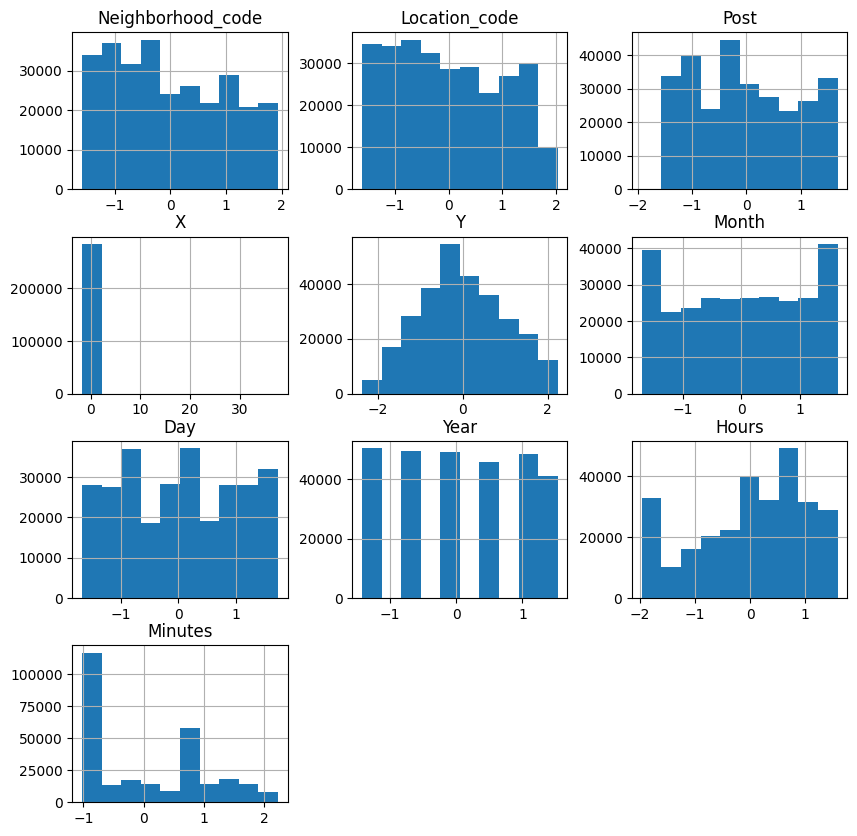

In [252]:
data_scaled.hist(figsize=(10,10));

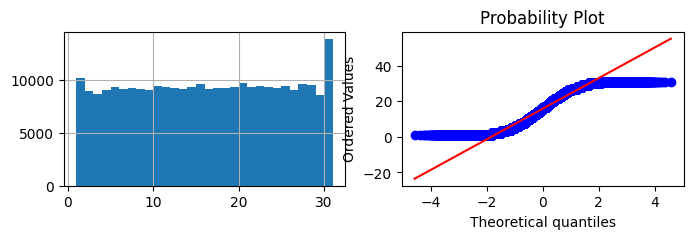

In [306]:
diagnostic_plots(data, 'Day')

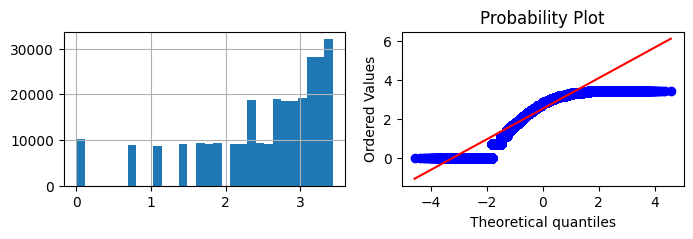

In [311]:
data['Day_log'] = np.log(data['Day'])
diagnostic_plots(data, 'Day_log')

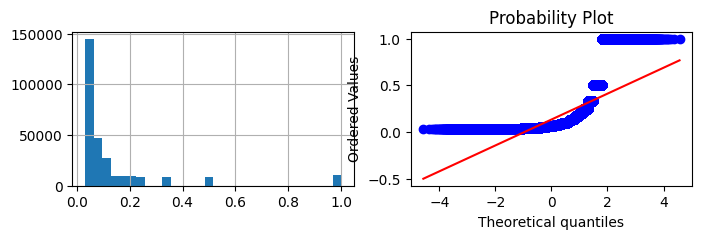

In [312]:
data['Day_reciprocal'] = 1/data['Day']
diagnostic_plots(data, 'Day_reciprocal')

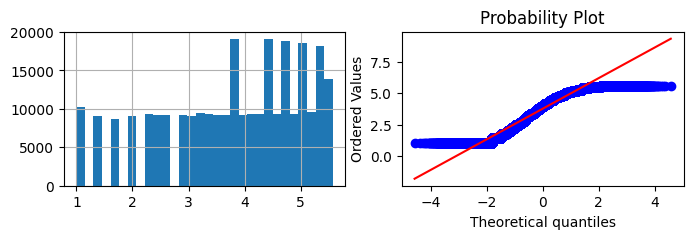

In [313]:
data['Day_sqrt'] = data['Day']**(1/2)
diagnostic_plots(data, 'Day_sqrt')

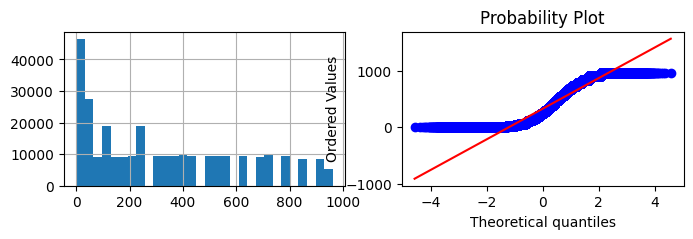

In [314]:
data['Day_exp'] = data['Day']**(2)
diagnostic_plots(data, 'Day_exp')

Оптимальное значение λ = 0.7300479792730377


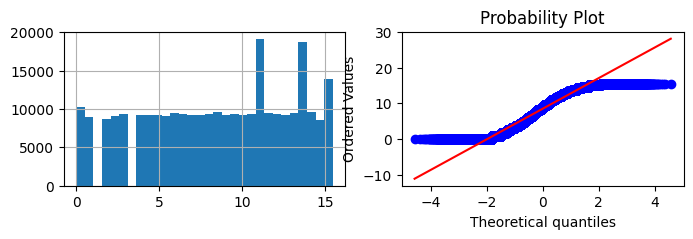

In [308]:
data['Day_boxcox'], param = stats.boxcox(data['Day'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Day_boxcox')

Оптимальное значение λ = 0.7394897707895179


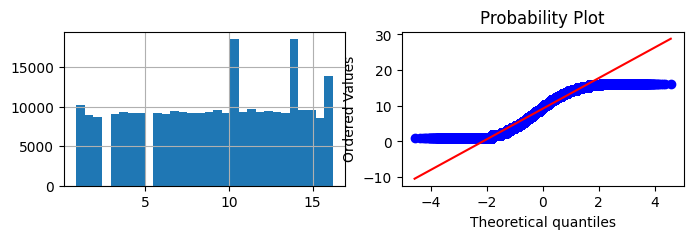

In [310]:
data['Day_yeojohnson'], param = stats.yeojohnson(data['Day'])
print('Оптимальное значение λ = {}'.format(param))
diagnostic_plots(data, 'Day_yeojohnson')